In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# import csv data
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [5]:
# inspect dfs
print('df-observations')
print(observations.head())
print('\n', 'df-species')
print(species.head())

df-observations
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

 df-species
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2

In [7]:
# note -- observations: observation times 

In [9]:
# explore species df
species_columns = species.columns
print(species_columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [11]:
# species length
species_length = len(species)
print('num of rows - species: ', species_length)
# dtypes
print(species.dtypes)



num of rows - species:  5824
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [13]:
# see if there is any redundent names
print(species['scientific_name'].nunique())

5541


In [15]:
print(species['common_names'].nunique())

5504


In [17]:
# look like there are redundent names for both scientific and common names
# but first, check for duplicated rows
print('number of duplicated rows in species df: ', species.duplicated().sum())

number of duplicated rows in species df:  0


In [29]:
# check for conservation_status
print((species.conservation_status.unique()))

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [35]:
# to check if there are duplicated rows based on category, scientific and common names
print(species[species.duplicated(subset=['category','scientific_name', 'common_names'], keep=False)])

     category      scientific_name     common_names conservation_status
560      Fish  Oncorhynchus mykiss    Rainbow Trout                 NaN
3020   Mammal          Canis lupus  Gray Wolf, Wolf         In Recovery
3283     Fish  Oncorhynchus mykiss    Rainbow Trout          Threatened
4448   Mammal          Canis lupus  Gray Wolf, Wolf          Endangered


In [37]:
# it shows that there are two duplicated rows in species df that need to be dropped
# drop duplicated rows in species
species.drop_duplicates(subset=['category','scientific_name', 'common_names'], inplace=True)
print(species[species.duplicated(subset=['category','scientific_name', 'common_names'], keep=False)])

Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


In [39]:
# count missing values in species
print(species.isna().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [43]:
# fill nan with 'no concern' for conservation_status column
species.fillna('No concern', inplace=True)
# check for nan
print(species.isna().sum())

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


In [59]:
# check for duplicated scientific names
print(species[species.duplicated(subset=['scientific_name'])])

            category                   scientific_name  \
3017          Mammal                    Cervus elaphus   
3019          Mammal            Odocoileus virginianus   
3020          Mammal                       Canis lupus   
3022          Mammal                     Puma concolor   
3025          Mammal                  Lutra canadensis   
...              ...                               ...   
5619  Vascular Plant  Panicum rigidulum var. rigidulum   
5638  Vascular Plant                    Setaria pumila   
5640  Vascular Plant                  Vulpia bromoides   
5643  Vascular Plant                     Vulpia myuros   
5750  Vascular Plant                   Rosa eglanteria   

                                           common_names conservation_status  
3017                                 Rocky Mountain Elk          No concern  
3019               White-Tailed Deer, White-Tailed Deer          No concern  
3020                                    Gray Wolf, Wolf         In Re

In [65]:
# exame some cases
print(species[species.scientific_name == 'Cervus elaphus'])
print(species[species.scientific_name == 'Odocoileus virginianus'])

     category scientific_name        common_names conservation_status
4      Mammal  Cervus elaphus       Wapiti Or Elk          No concern
3017   Mammal  Cervus elaphus  Rocky Mountain Elk          No concern
     category         scientific_name                          common_names  \
5      Mammal  Odocoileus virginianus                     White-Tailed Deer   
3019   Mammal  Odocoileus virginianus  White-Tailed Deer, White-Tailed Deer   

     conservation_status  
5             No concern  
3019          No concern  


In [69]:
# scientific names should be distinct, so there are duplicated rows 
# drop duplicated rows based on scientific name
species_clean = species.drop_duplicates(subset=['scientific_name'])
print(species_clean.duplicated(subset=['scientific_name']).sum())

0


In [73]:
# now the species_clean is really clean
# count the num of species
total_species = species_clean['scientific_name'].count()
print(total_species)

5541


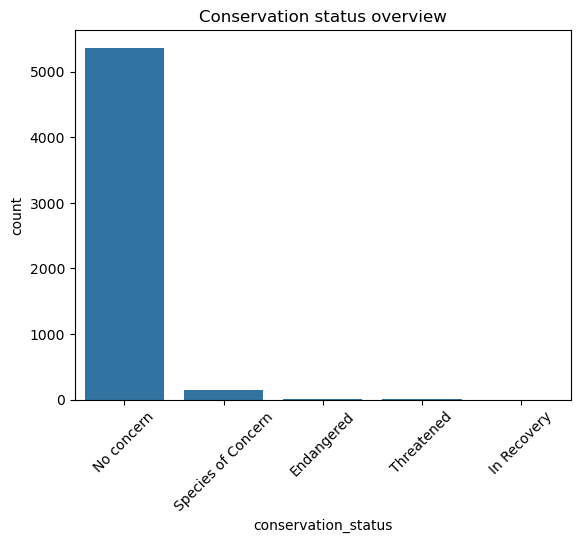

In [85]:
# barchart for consevation status
plt.figure()
sns.countplot(data = species_clean, x = 'conservation_status')
plt.ylabel('count')
plt.title('Conservation status overview')
plt.xticks(rotation=45)
plt.show()

In [87]:
# the absolute count bar chart is not good 
# calculate percentage
no_concern_rate = np.sum(species_clean['conservation_status']=='No concern')/len(species_clean)
concern_rate = np.sum(species_clean['conservation_status']=='Species of Concern')/len(species_clean)
endangered_rate = np.sum(species_clean['conservation_status']=='Endangered')/len(species_clean)
threatened_rate = np.sum(species_clean['conservation_status']=='Threatened')/len(species_clean)
in_recovery_rate = np.sum(species_clean['conservation_status']=='In Recovery')/len(species_clean)
print(no_concern_rate, concern_rate, endangered_rate, threatened_rate, in_recovery_rate)

0.9678758346868797 0.027251398664500992 0.0027070925825663237 0.0016242555495397943 0.0005414185165132648


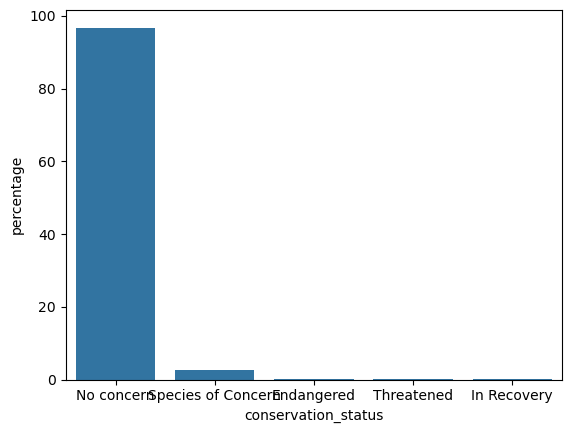

In [89]:
# try percentage bar chart
percent_conservation = species_clean['conservation_status'].value_counts(normalize=True) * 100
sns.barplot(x=percent_conservation.index, y=percent_conservation.values)
plt.ylabel('percentage')
plt.show()

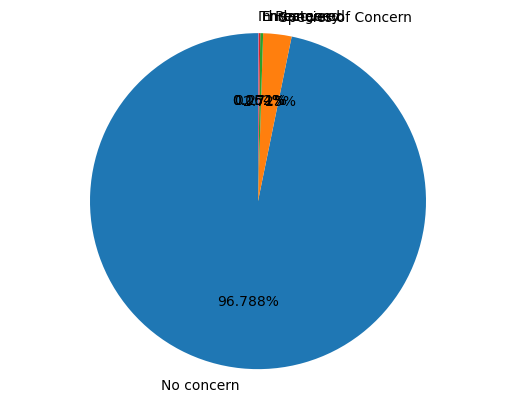

In [95]:
# still not good to see; try pie chart
plt.pie(species_clean['conservation_status'].value_counts(), labels=species_clean['conservation_status'].value_counts().index, autopct='%0.3f%%', startangle=90)
plt.axis('equal')
plt.show()

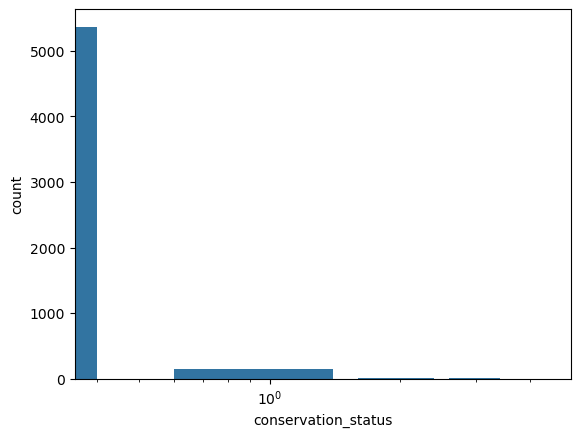

In [97]:
# pie chart is not good at all
# try log bar
sns.countplot(data=species_clean, x = 'conservation_status')
plt.xscale('log')
plt.show()

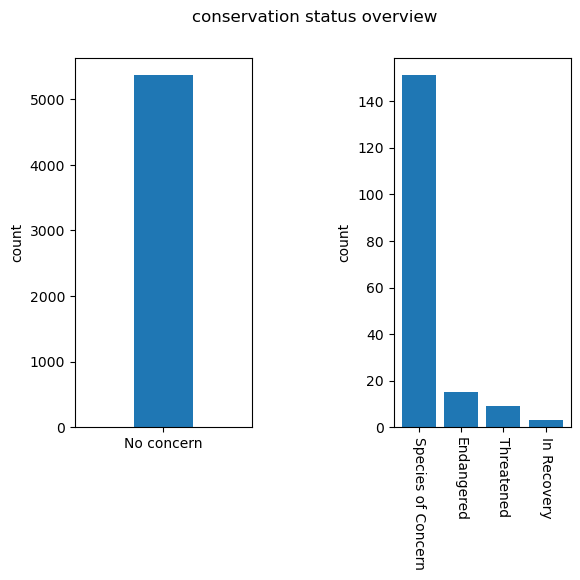

In [145]:
# still not good
# try side by side bar chart
plt.figure()
plt.subplot(1,2,1)
plt.bar(species_clean['conservation_status'].unique()[0] , np.sum(species_clean['conservation_status']=='No concern'))
plt.ylabel('count')
plt.xlim(-1.2,1.2)
plt.subplot(1,2,2)
plt.bar(species_clean.conservation_status.value_counts().index[1:], species_clean.conservation_status.value_counts().values[1:])
plt.ylabel('count')
plt.xticks(rotation=-90)
plt.subplots_adjust(hspace=0.8, wspace=0.8)
plt.suptitle('conservation status overview')
plt.show()

In [ ]:
# conservation status overview (percentage)

In [151]:
# endangered category count
endangered_species = species_clean[species_clean['conservation_status'] == 'Endangered']
print(len(endangered_species))
print(endangered_species['category'].value_counts())

15
category
Mammal            6
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: count, dtype: int64


In [153]:
# concern species
concerned_species = species_clean[species_clean['conservation_status'] == 'Species of Concern']
print(len(concerned_species))
print(concerned_species['category'].value_counts())

151
category
Bird                 68
Vascular Plant       43
Mammal               22
Reptile               5
Nonvascular Plant     5
Amphibian             4
Fish                  4
Name: count, dtype: int64
